### K-means
The Analogy: Organizing a Messy Closet

Imagine you have a pile of mixed-up clothes on the floor. You want to organize them into groups, but you're not sure how many groups to make. You decide you want 3 piles.

You randomly pick 3 items as "representatives" (one for each pile). Then you go through all the clothes and put each one in the pile of its closest representative.

After all clothes are in piles, you find the actual centre (average position) of each pile and make that the new representative.
You repeat this process until the piles stop changing significantly.

In simple terms: K-Means automatically groups similar items. It finds natural clusters in your data without any labels or categories provided.


## 🌀 K-Means Clustering

### 🧠 Explanation
K-Means is an **unsupervised learning** algorithm used to group unlabeled data into **k clusters**.  
Each cluster contains data points that are similar to each other and different from points in other clusters.

**Example:**  
Grouping customers by their spending behavior, credit usage, or transaction frequency.

---

### 🧮 Simple Math

🎯 Simple Explanation: "Automatically grouping similar things together"

📊 Simple Math: Distance = √[(x₂-x₁)² + (y₂-y₁)²]

💼 Application: Customer segmentation, Image compression                                                                                                                                                              

We want to find `k` cluster centers (called **centroids**) — μ₁, μ₂, …, μₖ —  
so that the total distance between each data point `xᵢ` and the nearest centroid is as small as possible.

**Objective:**

Minimize  
→  Σ (over i = 1 to n) [ min (over j = 1 to k) || xᵢ - μⱼ ||² ]

In simple terms:
- Assign each point to the nearest center.
- Update each center to be the **average** of all points assigned to it.
- Repeat until centers stop changing much.

---

### ⚙️ Algorithm Steps
1. Choose the number of clusters **k**.  
2. Initialize **k** cluster centers randomly.  
3. Assign each point to the **nearest center**.  
4. Update centers to the **mean** of assigned points.  
5. Repeat steps 3–4 until the centers do not change significantly.

---

### 💼 Financial Example
**Use Case:** Customer Segmentation in Credit Risk  
Banks can use K-Means to group customers into clusters such as:
- High income, low default risk  
- Medium income, moderate risk  
- Low income, high default risk  


Each group can have customized loan offers or risk policies.

**Companies using K-Means:**
- **American Express** – customer segmentation & marketing personalization  
- **Capital One** – credit card behavior clustering  
- **JPMorgan Chase** – portfolio and customer risk segmentation  

---

![Clustering](https://upload.wikimedia.org/wikipedia/commons/c/c8/Cluster-2.svg)

![Clustering](http://shabal.in/visuals/kmeans/random.gif)

![Clustering](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)


In [13]:
# for handling data and dataframe
import pandas as pd
import numpy as np
# Graphical representation of the data
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing modules
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
# Machine Learning modules
from sklearn.cluster import KMeans
# data split
from sklearn.model_selection import train_test_split
# data scaling
from sklearn.preprocessing import StandardScaler


In [6]:
data= pd.read_csv('Datasets/Housing.csv') # check you own datapath
print(data.head())

   price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase gashw  \
0  42000     5850         3        1        2      yes      no      yes    no   
1  38500     4000         2        1        1      yes      no       no    no   
2  49500     3060         3        1        1      yes      no       no    no   
3  60500     6650         3        1        2      yes     yes       no    no   
4  61000     6360         2        1        1      yes      no       no    no   

  airco  garagepl prefarea  
0    no         1       no  
1    no         0       no  
2    no         0       no  
3    no         0       no  
4    no         0       no  


In [9]:
# data preprocessing
lb = LabelBinarizer()
le = LabelEncoder()
ohe = OneHotEncoder() 
ss = StandardScaler()

In [11]:
# transform categorical data
data['driveway']= lb.fit_transform(data['driveway'])
data['recroom'] = le.fit_transform(data['recroom'])
# transform categorical data via loop
le_columns= ['fullbase', 'gashw', 'airco',  'prefarea']
for col in le_columns:
    data[col]= le.fit_transform(data[col])
# transform stories variable via OneHotEncoding 
onehotencoding = ohe.fit_transform(data[['stories']]).toarray()
onehotencoding= pd.DataFrame(onehotencoding)
onehotencoding = onehotencoding.rename(columns={0: 'stories_1', 1: 'storeis_2', 2: 'stories_3', 3: 'stories_4'})
data = data.join(onehotencoding)
data.drop('stories', axis=1, inplace= True)
print(data.head())

   price  lotsize  bedrooms  bathrms  driveway  recroom  fullbase  gashw  \
0  42000     5850         3        1         1        0         1      0   
1  38500     4000         2        1         1        0         0      0   
2  49500     3060         3        1         1        0         0      0   
3  60500     6650         3        1         1        1         0      0   
4  61000     6360         2        1         1        0         0      0   

   airco  garagepl  prefarea  stories_1  storeis_2  stories_3  stories_4  
0      0         1         0        0.0        1.0        0.0        0.0  
1      0         0         0        1.0        0.0        0.0        0.0  
2      0         0         0        1.0        0.0        0.0        0.0  
3      0         0         0        0.0        1.0        0.0        0.0  
4      0         0         0        1.0        0.0        0.0        0.0  


In [12]:
#data scaling
data= ss.fit_transform(data)
print(data)


[[-0.97913617  0.32302806  0.0472349  ...  1.13759292 -0.28116078
  -0.28493529]
 [-1.11032939 -0.53101296 -1.31014696 ... -0.87904907 -0.28116078
  -0.28493529]
 [-0.69800783 -0.96495812  0.0472349  ... -0.87904907 -0.28116078
  -0.28493529]
 ...
 [ 1.30737434  0.39227462  0.0472349  ... -0.87904907 -0.28116078
   3.5095688 ]
 [ 1.3823419   0.39227462  0.0472349  ...  1.13759292 -0.28116078
  -0.28493529]
 [ 1.3823419   0.39227462  0.0472349  ...  1.13759292 -0.28116078
  -0.28493529]]


In [14]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=41)
kmeans_= kmeans.fit_predict(data)
kmeans_

array([2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 3, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 3,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 3, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3,
       0, 0, 0, 2, 3, 1, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 2, 0, 2, 3, 3, 3, 3, 2, 2,
       2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 3, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 3, 1, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,

In [16]:
clu_pred= pd.DataFrame(kmeans_)
print(clu_pred.head())

   0
0  2
1  0
2  0
3  2
4  0


In [20]:
clu_data= pd.read_csv('datasets/Housing.csv') # check you data path
clu_data= clu_data.join(clu_pred)
clu_data = clu_data.rename(columns ={0:'Cluster'})
print(clu_data.head())

   price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase gashw  \
0  42000     5850         3        1        2      yes      no      yes    no   
1  38500     4000         2        1        1      yes      no       no    no   
2  49500     3060         3        1        1      yes      no       no    no   
3  60500     6650         3        1        2      yes     yes       no    no   
4  61000     6360         2        1        1      yes      no       no    no   

  airco  garagepl prefarea  Cluster  
0    no         1       no        2  
1    no         0       no        0  
2    no         0       no        0  
3    no         0       no        2  
4    no         0       no        0  


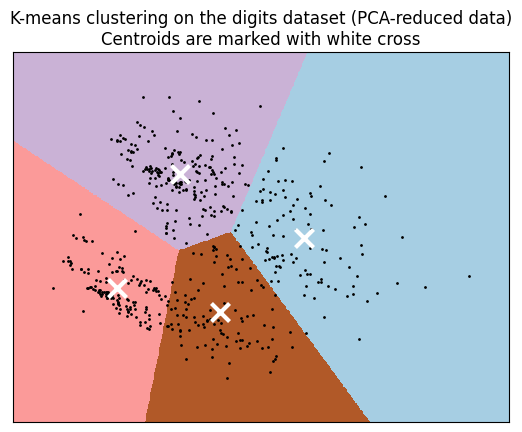

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()